In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [3]:
import pandas as pd

# Load CSV predictions.csv
df = pd.read_csv('predictions.csv')
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,0,3,Background,0.999993,"[0.9999933242797852, 9.965637256387216e-13, 1...."
1,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,3,6,Background,0.999961,"[0.9999608993530273, 6.20628244976662e-12, 1.7..."
2,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,6,9,Background,0.999990,"[0.9999902248382568, 3.525675628182623e-12, 1...."
3,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,9,12,Background,0.999985,"[0.9999853372573853, 2.0525599449261467e-12, 2..."
4,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,12,15,Background,0.999985,"[0.9999849796295166, 7.517779801458069e-12, 1...."
...,...,...,...,...,...,...,...
28837,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1296,1299,Background,0.999998,"[0.999997615814209, 1.7911403697029593e-12, 5...."
28838,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1299,1302,Background,0.999973,"[0.9999725818634033, 6.074602626471304e-11, 1...."
28839,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1302,1305,Background,0.998901,"[0.9989010095596313, 5.0256755201871783e-08, 1..."
28840,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1305,1308,Background,0.999959,"[0.9999594688415527, 2.0932187927424906e-10, 1..."


In [4]:
## Define class mapping
CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    'Fin_FinbackWhale': 3,
    "Grampus_Risso'sDolphin": 4,
    'HarborPorpoise': 5,
    'HumpbackWhale': 6,
    'KillerWhale': 7,
    'Long_FinnedPilotWhale': 8,
    'MinkeWhale': 9,
    'SpermWhale': 10,
    'StripedDolphin': 11
}

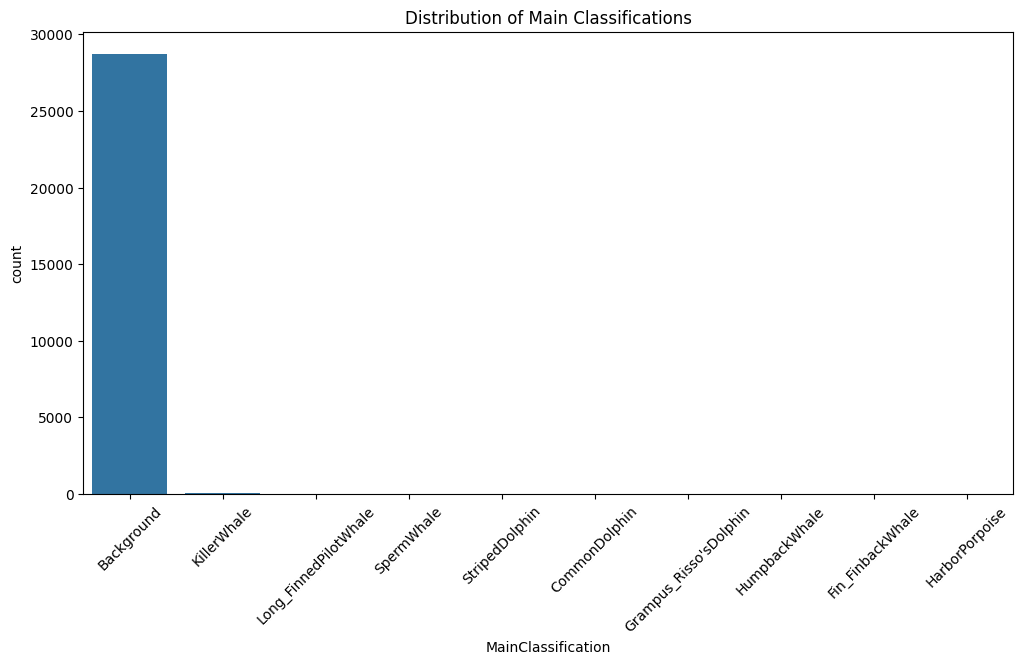

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of main classifications
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MainClassification', order=df['MainClassification'].value_counts().index)
plt.title('Distribution of Main Classifications')
plt.xticks(rotation=45)
plt.show()

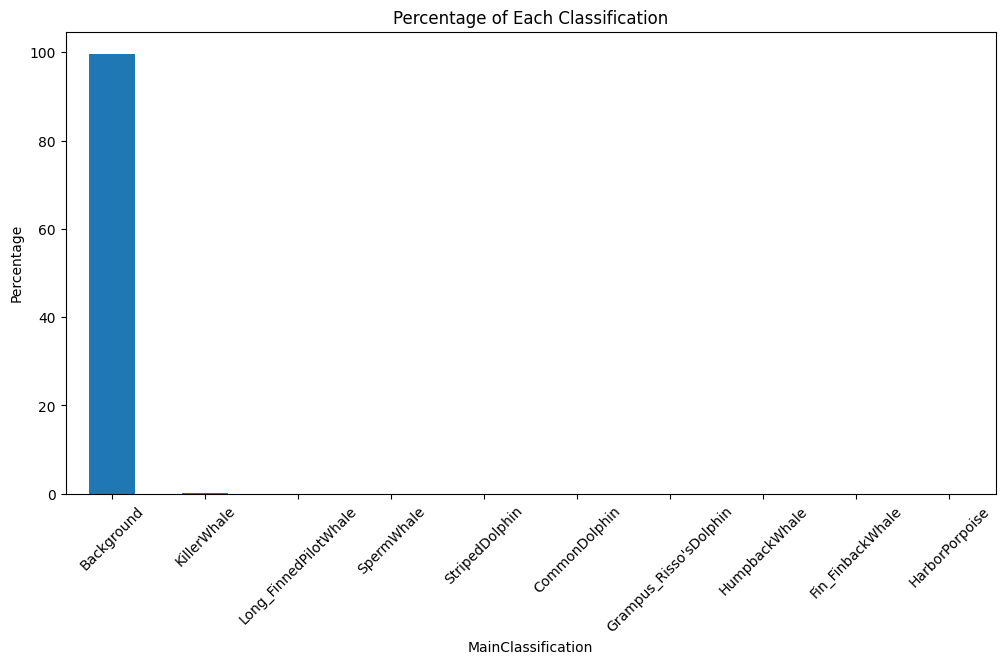

In [6]:
# Calculate the percentage of each classification
classification_counts = df['MainClassification'].value_counts(normalize=True) * 100

# Plot the percentage of each classification
plt.figure(figsize=(12, 6))
classification_counts.plot(kind='bar')
plt.title('Percentage of Each Classification')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

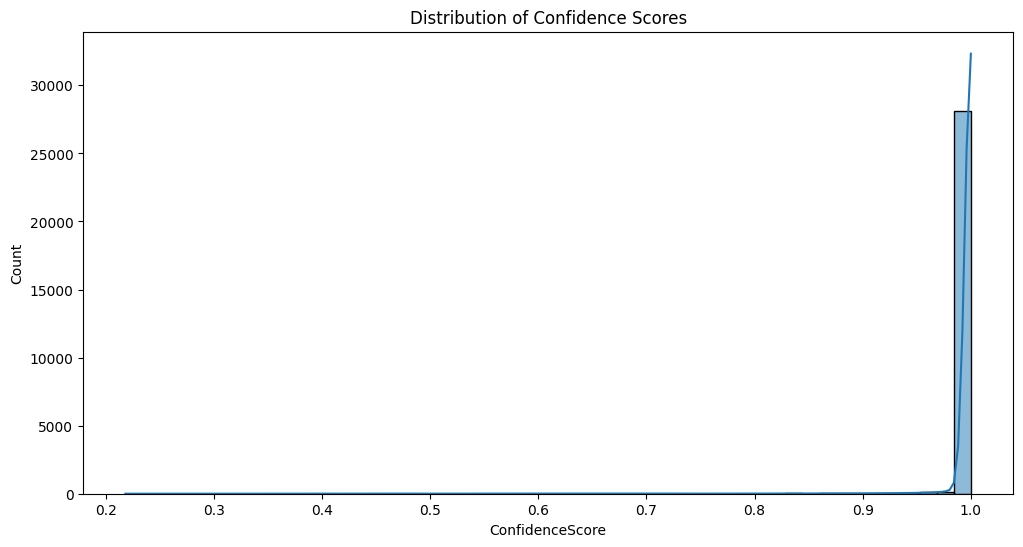

In [7]:
# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

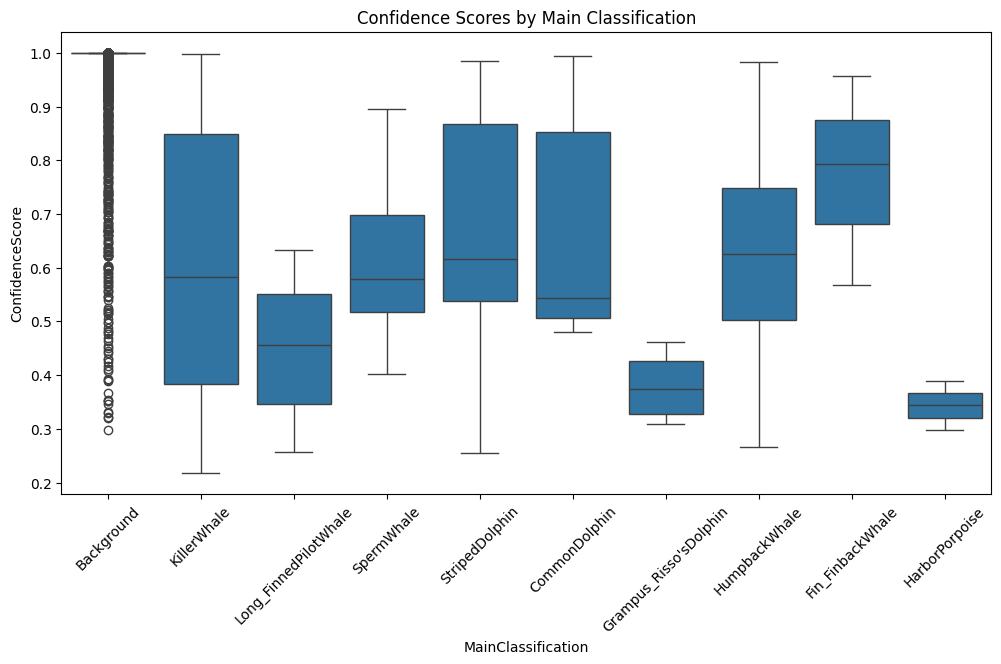

In [8]:
# Plot the confidence scores by main classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore', order=df['MainClassification'].value_counts().index)
plt.title('Confidence Scores by Main Classification')
plt.xticks(rotation=45)
plt.show()

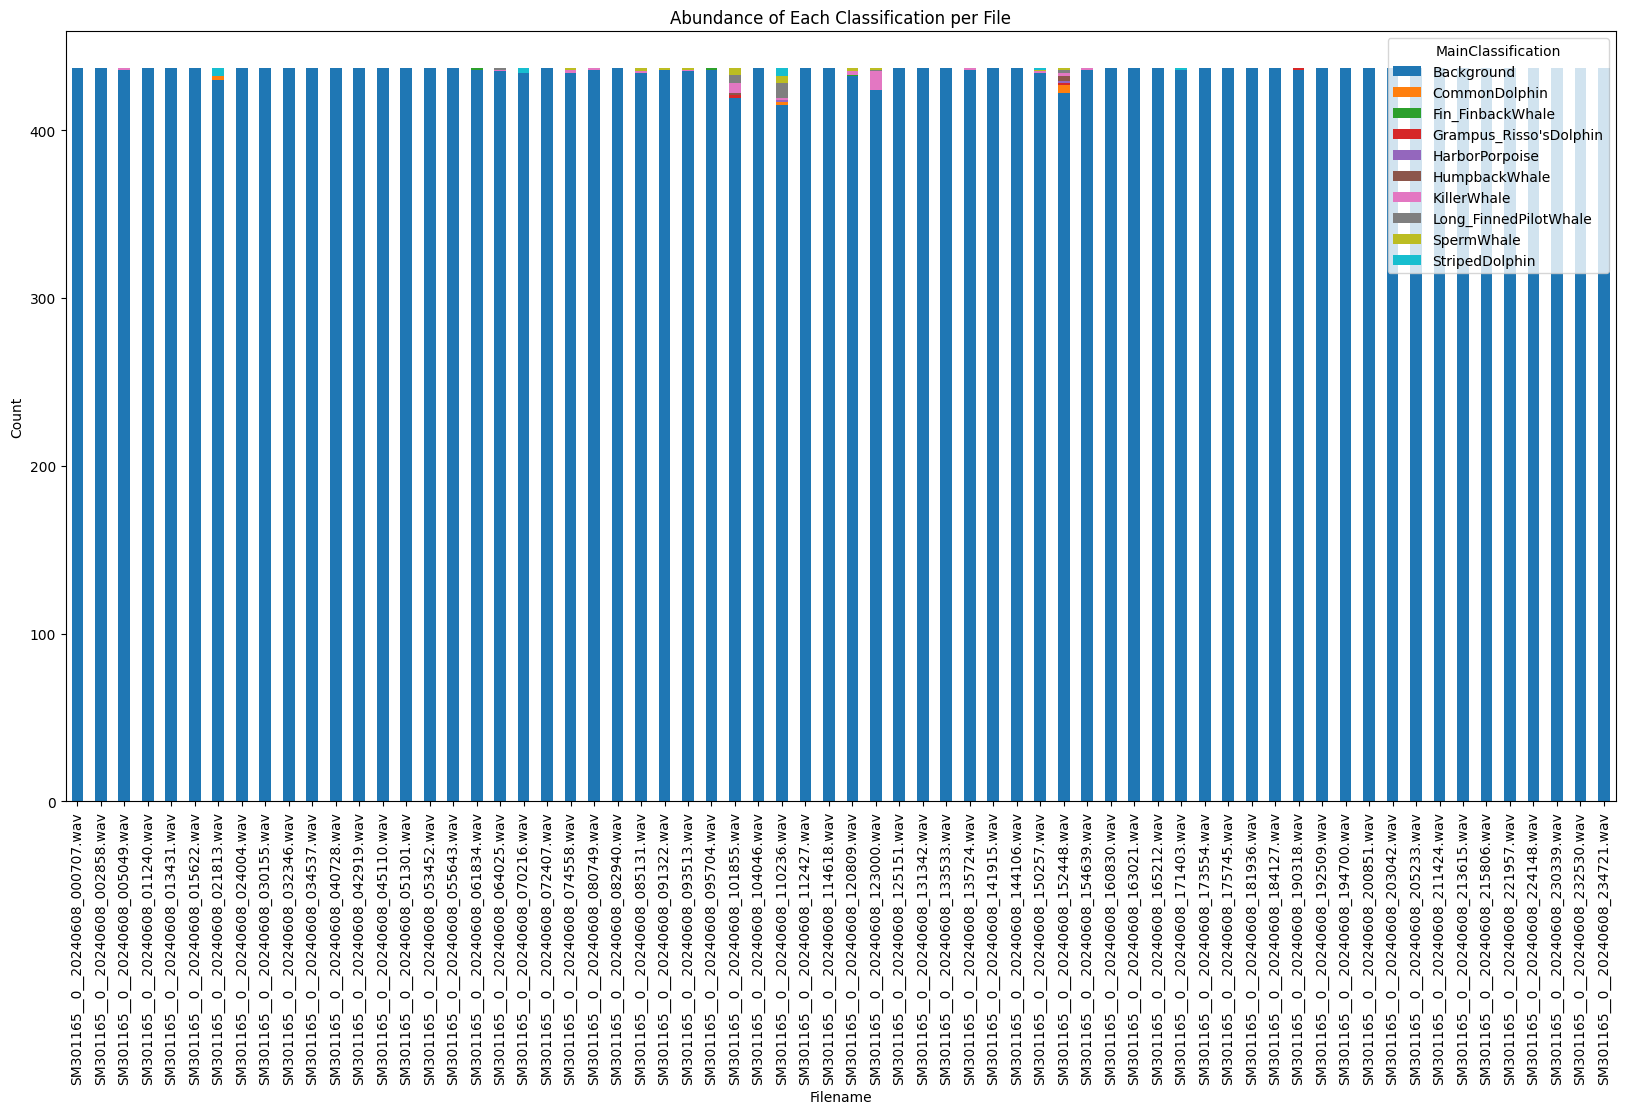

In [17]:
# Calculate the abundance of each classification per file
abundance_per_file = df.groupby(['Filename', 'MainClassification']).size().unstack(fill_value=0)

# Plot the abundance of each classification per file
abundance_per_file.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Abundance of Each Classification per File')
plt.ylabel('Count')
plt.xticks()
plt.show()

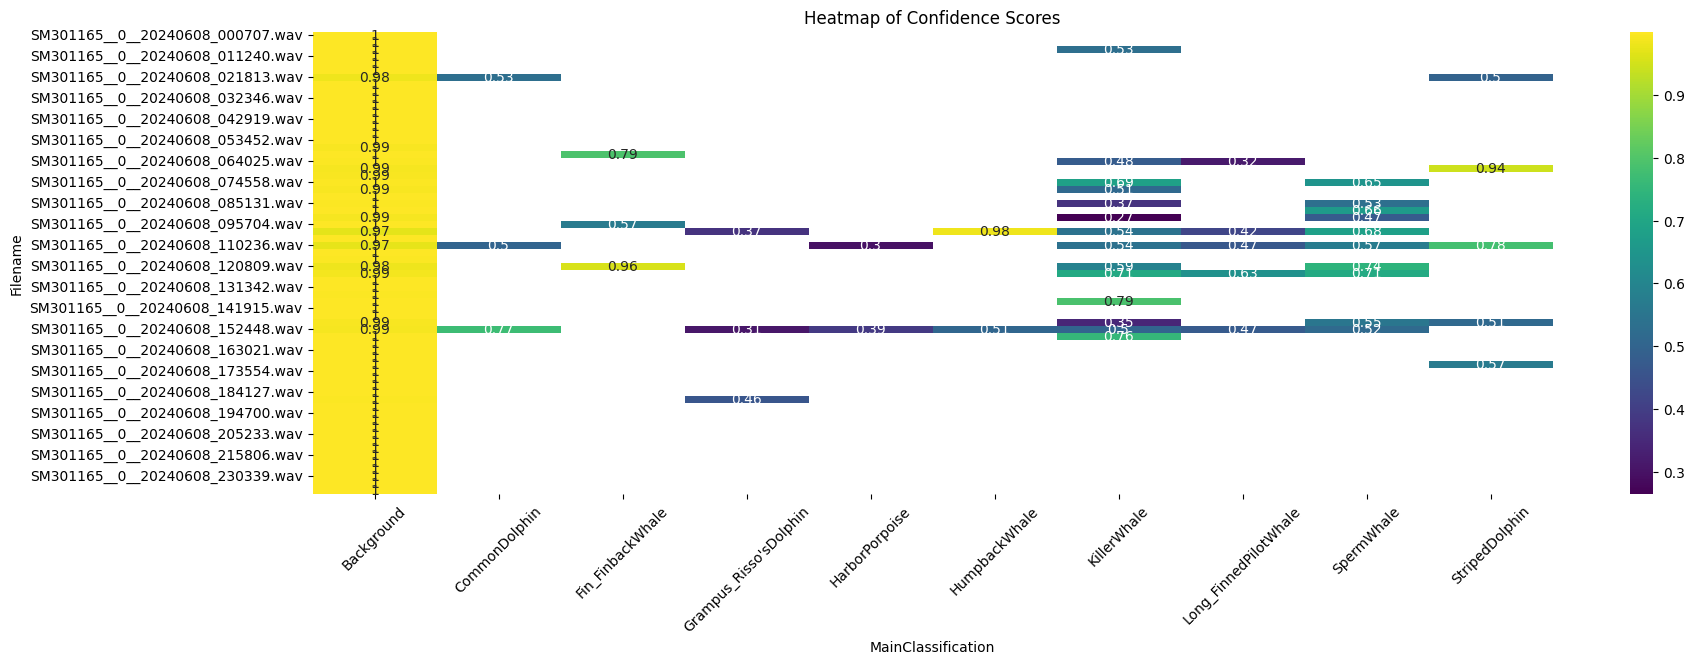

In [21]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Filename', columns='MainClassification', values='ConfidenceScore', aggfunc='mean')

# Plot the heatmap of confidence scores
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Confidence Scores')
plt.xticks(rotation=45)
plt.show()

In [24]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,0,3,Background,0.999993,"[0.9999933242797852, 9.965637256387216e-13, 1...."
1,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,3,6,Background,0.999961,"[0.9999608993530273, 6.20628244976662e-12, 1.7..."
2,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,6,9,Background,0.999990,"[0.9999902248382568, 3.525675628182623e-12, 1...."
3,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,9,12,Background,0.999985,"[0.9999853372573853, 2.0525599449261467e-12, 2..."
4,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_000707.wav,12,15,Background,0.999985,"[0.9999849796295166, 7.517779801458069e-12, 1...."
...,...,...,...,...,...,...,...
28837,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1296,1299,Background,0.999998,"[0.999997615814209, 1.7911403697029593e-12, 5...."
28838,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1299,1302,Background,0.999973,"[0.9999725818634033, 6.074602626471304e-11, 1...."
28839,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1302,1305,Background,0.998901,"[0.9989010095596313, 5.0256755201871783e-08, 1..."
28840,../../../mnt/e/Seanimalmove/WOPAM DAY 2024/SM3...,SM301165__0__20240608_234721.wav,1305,1308,Background,0.999959,"[0.9999594688415527, 2.0932187927424906e-10, 1..."


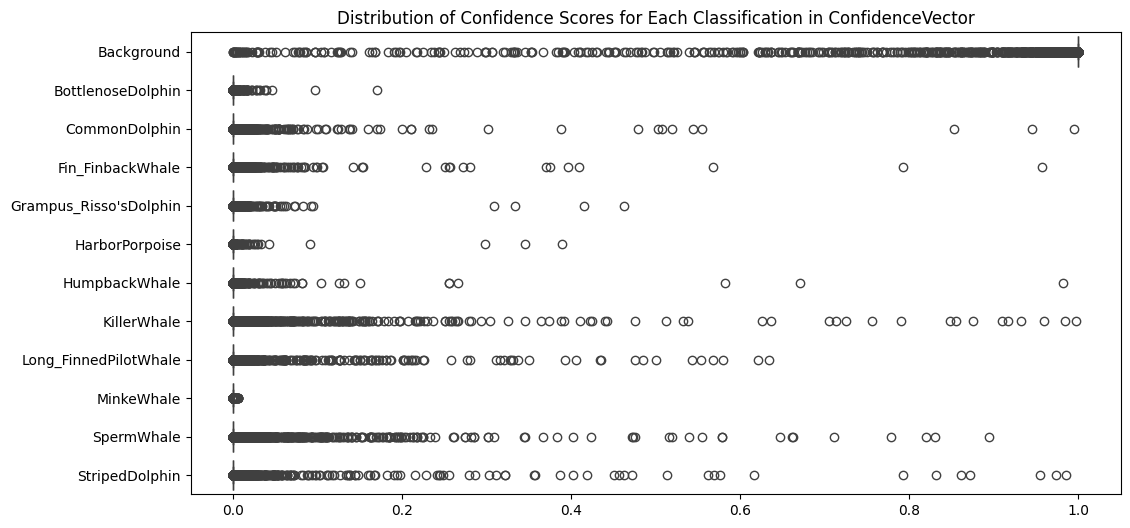

In [25]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
confidence_vector = df['ConfidenceVector'].apply(eval)
confidence_vector = pd.DataFrame(confidence_vector.tolist(), columns=CLASSES_MAPPING.keys())

plt.figure(figsize=(12, 6))
sns.boxplot(data=confidence_vector, orient='h')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

In [28]:
# Load predictions file
predictions_file = "predictions.csv"  # Replace with your actual file path
predictions_df = pd.read_csv(predictions_file)

# Reverse mapping for easy lookup
IDX_TO_CLASSES = {v: k for k, v in CLASSES_MAPPING.items()}

In [32]:
def analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.5):
    results = []

    for _, row in df.iterrows():
        confidence_vector = eval(row['ConfidenceVector'])  # Convert string to list
        main_class_idx = np.argmax(confidence_vector)
        main_class_score = confidence_vector[main_class_idx]

        # Sort classes by confidence
        sorted_classes = sorted(
            enumerate(confidence_vector), key=lambda x: x[1], reverse=True
        )

        # Filter background if necessary
        if ignore_background:
            sorted_classes = [sc for sc in sorted_classes if sc[0] != CLASSES_MAPPING['Background']]

        # Filter by confidence threshold
        sorted_classes = [sc for sc in sorted_classes if sc[1] >= confidence_threshold]

        # Create a summary for this row
        summary = {
            'Filename': row['Filename'],
            'StartSecond': row['StartSecond'],
            'EndSecond': row['EndSecond'],
            'MainClassification': IDX_TO_CLASSES[main_class_idx],
            'MainConfidenceScore': main_class_score,
            'TopClasses': [
                {
                    'Class': IDX_TO_CLASSES[class_idx],
                    'Score': score
                }
                for class_idx, score in sorted_classes[:5]  # Top 5 classifications
            ]
        }
        results.append(summary)

    return results

# Analyze with and without background, using a confidence threshold of 0.5
results_with_background = analyze_confidence_vectors(predictions_df, ignore_background=False, confidence_threshold=0.3)
results_without_background = analyze_confidence_vectors(predictions_df, ignore_background=True, confidence_threshold=0.3)

Plotting results with background:


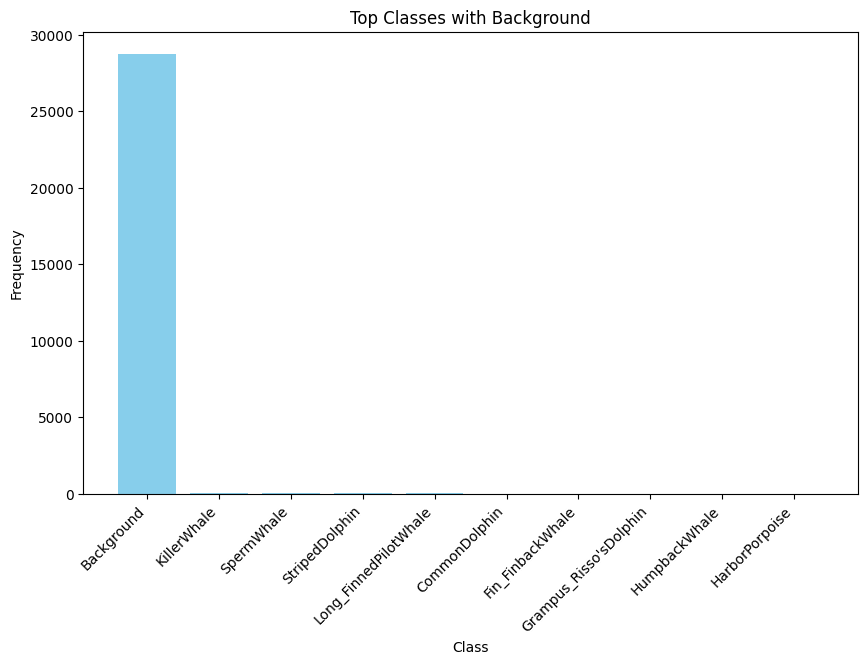


Plotting results without background:


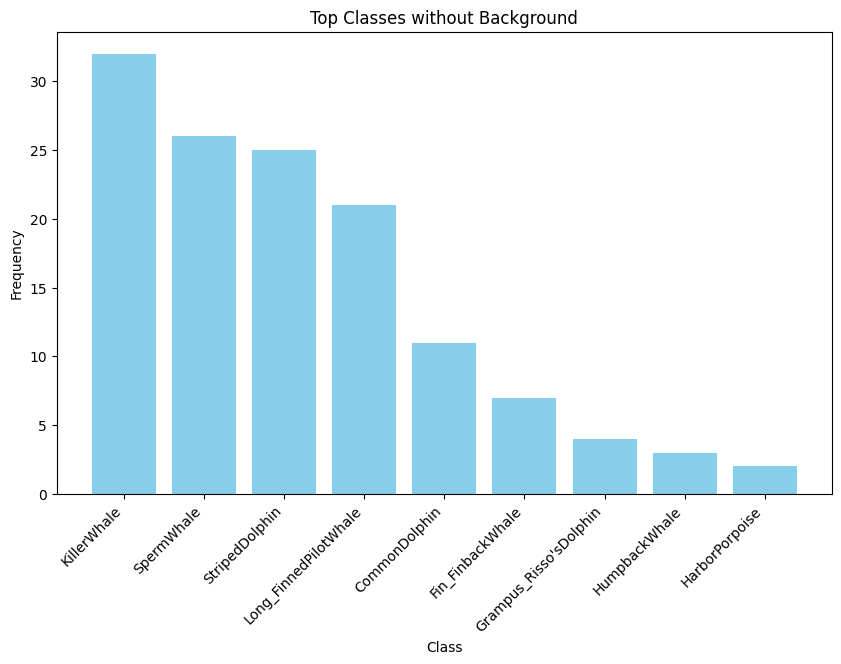

In [33]:
# Visualization function
def plot_top_classes(results, title):
    class_counts = {}

    for result in results:
        for entry in result['TopClasses']:
            class_name = entry['Class']
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Sort by frequency
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot results
print("Plotting results with background:")
plot_top_classes(results_with_background, "Top Classes with Background")

print("\nPlotting results without background:")
plot_top_classes(results_without_background, "Top Classes without Background")